In [1]:
from gibbs.dataclass import GibbsResult,get_results
import numpy as np
from gibbs.utils import simple_purify_hamiltonian,printarray,spectral_dec,candidate, lattice_hamiltonian, noise_hamiltonian
import matplotlib.pyplot as plt
from gibbs.learning.bayesian_learning_v2 import BayesianLearning
from gibbs.learning.constraint_matrix import ConstraintMatrixFactory
from gibbs.plots.plots import compare_preparations, axis_locality,preparation
import plotly.express as px
from qiskit.quantum_info import state_fidelity,SparsePauliOp

%load_ext autoreload
%autoreload 2

In [2]:
result = get_results("../scripts_lap/job_13_qasm")[0]
preparation(result)

(111,) (111,) (111,)


In [ ]:
from qiskit.primitives import BackendEstimator
from qiskit.providers.fake_provider import FakeAuckland
estimator = BackendEstimator(backend = FakeAuckland())
cmat = ConstraintMatrixFactory(result.num_qubits,2,3,estimator=estimator)
K,E = cmat.create_cmat(result.state_ansatz(-1),shots=1e6)

The fidelity with the first and second reconstruction is 0.9845935823188825 and 0.6126661867056392


/home/drudis/python_environements/gibbsvenv/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning:

Casting complex values to real discards the imaginary part



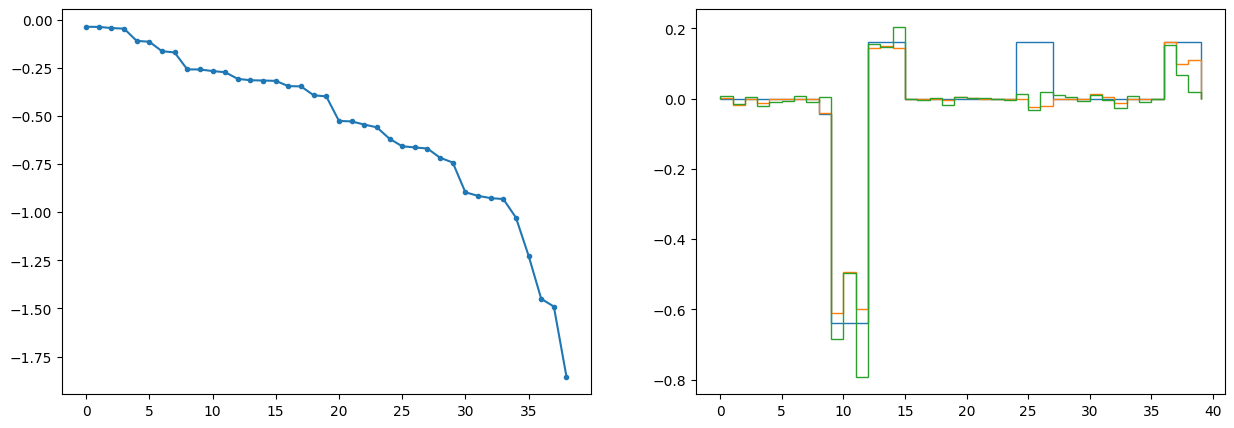

In [8]:
s,v = spectral_dec(K)

co = result.coriginal[:cmat.learning_basis.size]*result.betas[-1]


cand = candidate(v[-1],co)
candB = candidate(v[-2],co)


state = result.state_vector(-1)
stateA = simple_purify_hamiltonian((cand,cmat.learning_basis))
stateB = simple_purify_hamiltonian((candB,cmat.learning_basis))

print(f"The fidelity with the first and second reconstruction is {state_fidelity(state,stateA)} and {state_fidelity(state,stateB)}")

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(np.log10(s),marker=".")
ax[1].stairs(co)
ax[1].stairs(result.cfaulties[-1][:cmat.learning_basis.size])
ax[1].stairs(cand)